## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliance and light

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

## Read data and basic data clean-up

In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv("energy_test.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,01-05-2016 00:00,50,0,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,...,19.166667,38.200000,4.30,763.700000,86.000000,2.000000,40.000000,2.20,15.310003,15.310003
1,01-05-2016 00:10,60,0,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,...,19.133333,38.290000,4.28,763.716667,86.333333,2.166667,38.166667,2.22,11.240067,11.240067
2,01-05-2016 00:20,50,0,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,...,19.133333,38.363333,4.27,763.733333,86.666667,2.333333,36.333333,2.23,21.808814,21.808814
3,01-05-2016 00:30,50,0,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,...,19.166667,38.500000,4.25,763.750000,87.000000,2.500000,34.500000,2.25,47.000534,47.000534
4,01-05-2016 00:40,60,0,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,...,19.166667,38.633333,4.23,763.766667,87.333333,2.666667,32.666667,2.27,8.059441,8.059441


## Perform analysis & model development 

In [2]:
print("Shape of the dataset:",df.shape) 

Shape of the dataset: (3853, 29)


In [3]:
print("Column Names in the dataset:",df.columns) 

Column Names in the dataset: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 29 columns):
date           3853 non-null object
Appliances     3853 non-null int64
lights         3853 non-null int64
T1             3853 non-null float64
RH_1           3853 non-null float64
T2             3853 non-null float64
RH_2           3853 non-null float64
T3             3853 non-null float64
RH_3           3853 non-null float64
T4             3853 non-null float64
RH_4           3853 non-null float64
T5             3853 non-null float64
RH_5           3853 non-null float64
T6             3853 non-null float64
RH_6           3853 non-null float64
T7             3853 non-null float64
RH_7           3853 non-null float64
T8             3853 non-null float64
RH_8           3853 non-null float64
T9             3853 non-null float64
RH_9           3853 non-null float64
T_out          3853 non-null float64
Press_mm_hg    3853 non-null float64
RH_out         3853 non-null float64
Windspeed 

In [5]:
df.describe(include=['int64','float64','object'])

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3853,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,...,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000
unique,3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,09-05-2016 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,94.199325,1.770049,23.877728,41.219759,23.253625,39.905697,25.010280,38.903170,23.771948,...,22.427778,42.219581,13.764638,755.898430,71.402673,3.079419,36.939138,7.985933,24.829057,24.829057
std,NaN,86.795158,5.509556,1.094320,5.186833,2.155510,6.085430,1.388252,3.438046,1.217318,...,1.303415,4.446296,4.959813,5.630135,19.039219,1.658762,8.911282,4.132702,14.427513,14.427513
min,NaN,20.000000,0.000000,20.390000,27.023333,17.390000,20.463333,22.100000,28.766667,19.200000,...,19.100000,29.850000,1.700000,744.100000,24.000000,0.000000,1.000000,-1.400000,0.013539,0.013539
25%,NaN,50.000000,0.000000,23.175000,37.700000,21.808571,35.555844,24.180000,36.590000,23.100000,...,22.000000,39.025714,10.300000,751.750000,56.333333,2.000000,30.666667,5.300000,12.080429,12.080429
50%,NaN,60.000000,0.000000,24.000000,40.326667,23.200000,39.948052,24.890000,38.230000,23.790000,...,22.700000,41.941429,13.800000,756.200000,74.000000,3.000000,40.000000,8.270000,24.761997,24.761997
75%,NaN,100.000000,0.000000,24.760000,45.590000,24.600000,44.134000,26.200000,41.790000,24.600000,...,23.200000,46.230000,16.700000,760.100000,88.000000,4.000000,40.000000,11.300000,37.118332,37.118332


Minimum consumption is  20Wh, which indicates that there are certain rooms which uses minimum energy, like teenager room on other hand 850Wh indicates that the geysers in washroom causing this much use of energy.

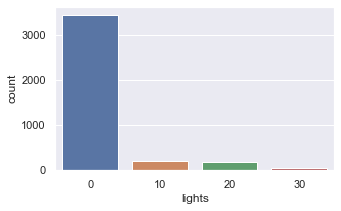

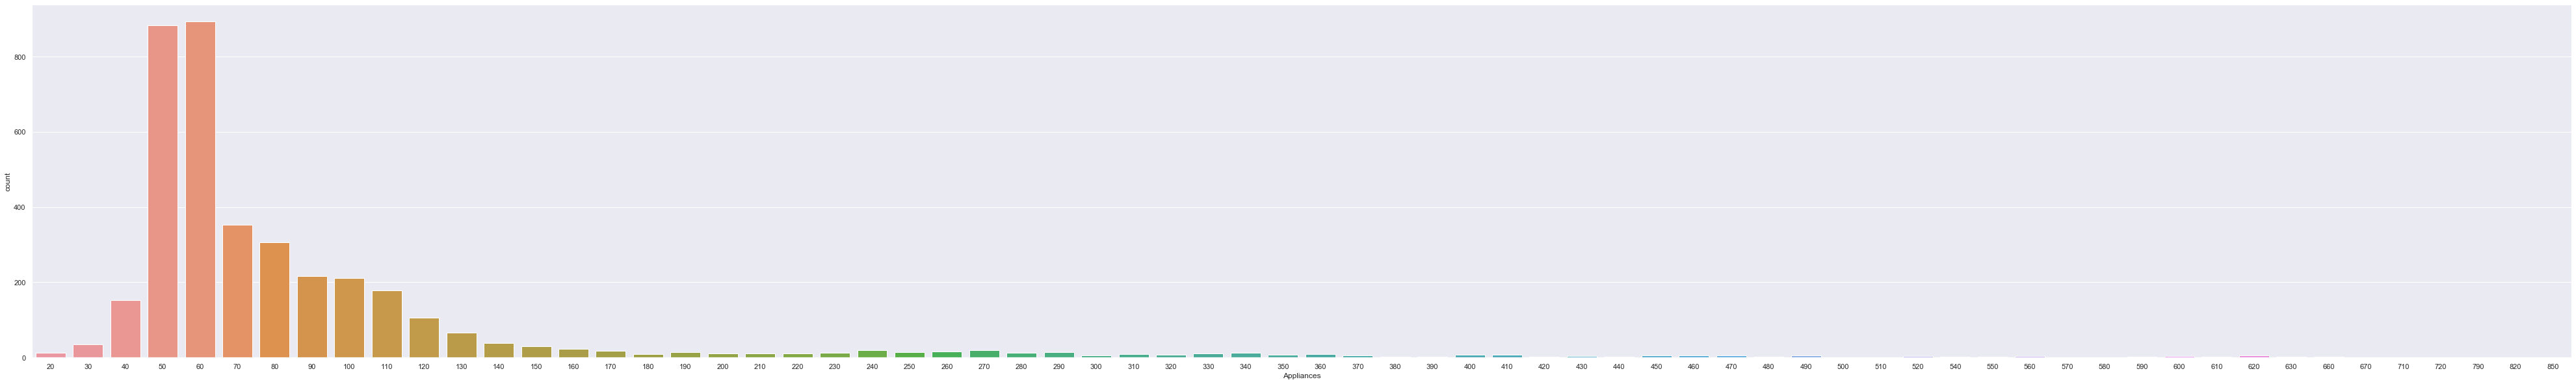

In [6]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(x='lights', data=df)
plt.show()
sns.set(rc={'figure.figsize':(70,10)})
sns.countplot(x='Appliances', data=df)
plt.show()

In [98]:
# plt.bar(df["date"],df["Appliances"],align='center')
# plt.xlabel('Date')
# plt.ylabel('Energy Consumption Appliances(Wh)')
# plt.show()

Observations:
In case of "lights" feature, almost 90% data is 0 , its good example of sparse column , conclusive enough to drop the column , and initially i though adding lights and appliances column together to make one target variable , but because more number of zeros in light conclude that even after adding to applicances column, appliances is not much changing at every 10 min.

For date coulmn: As there will be more weekdays than weekend in a week , using date as feature will not work , as it will mostly same number of value because of more number of weekdays. 

In [7]:
df = df.drop(['lights','date'], axis=1)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,50,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,37.730000,19.5,...,19.166667,38.200000,4.30,763.700000,86.000000,2.000000,40.000000,2.20,15.310003,15.310003
1,60,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,37.663333,19.5,...,19.133333,38.290000,4.28,763.716667,86.333333,2.166667,38.166667,2.22,11.240067,11.240067
2,50,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,37.590000,19.5,...,19.133333,38.363333,4.27,763.733333,86.666667,2.333333,36.333333,2.23,21.808814,21.808814
3,50,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,37.500000,19.5,...,19.166667,38.500000,4.25,763.750000,87.000000,2.500000,34.500000,2.25,47.000534,47.000534
4,60,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,37.500000,19.5,...,19.166667,38.633333,4.23,763.766667,87.333333,2.666667,32.666667,2.27,8.059441,8.059441


Based on distribution , we will try finding out, which one of the variables are following normal distribution or not.

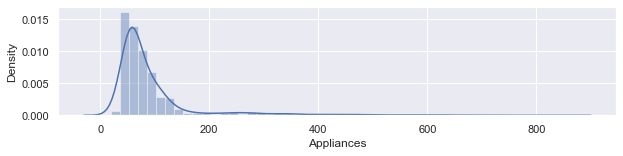

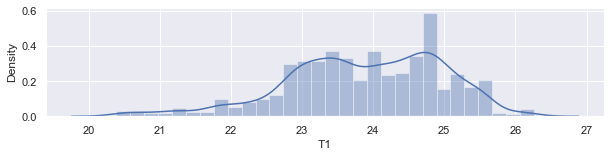

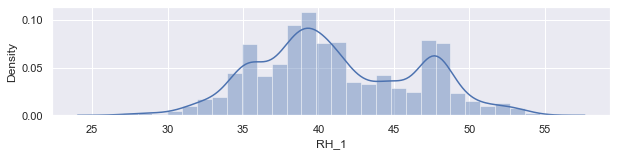

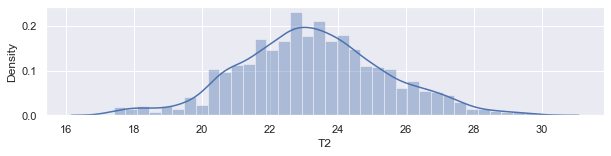

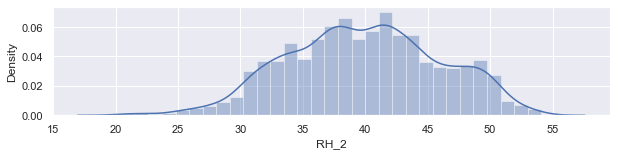

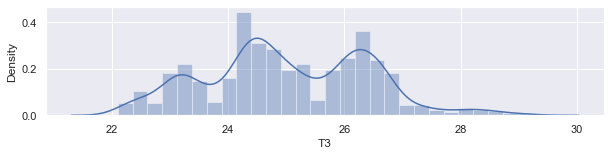

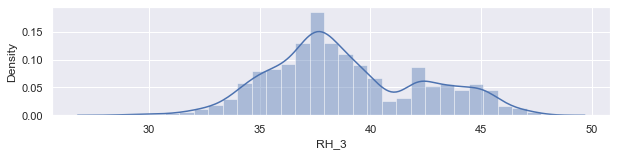

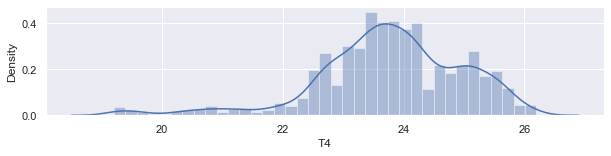

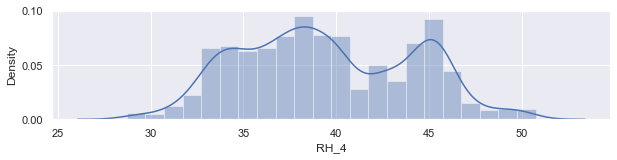

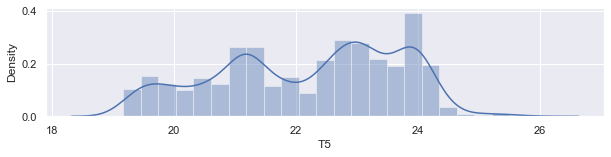

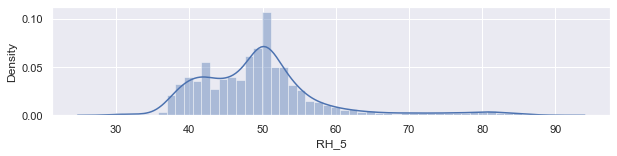

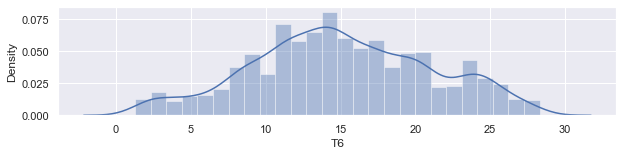

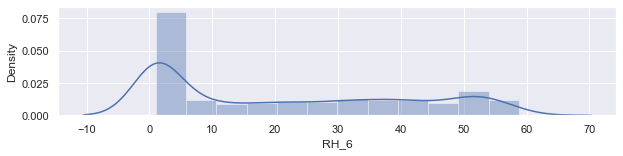

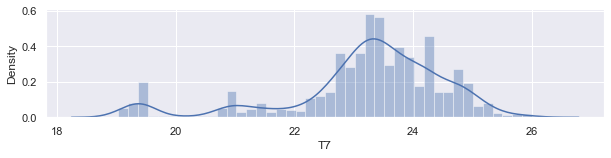

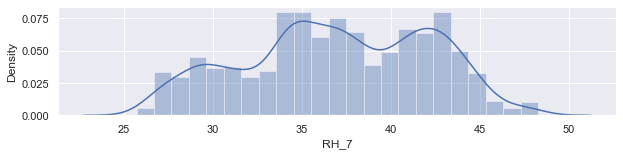

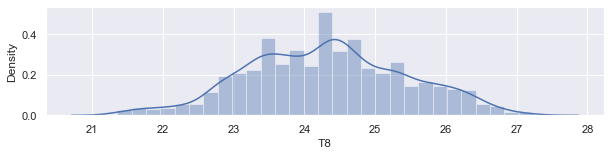

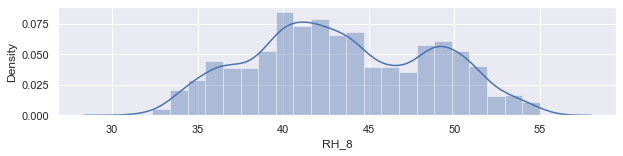

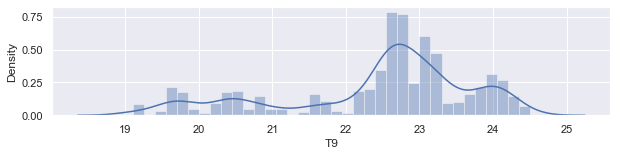

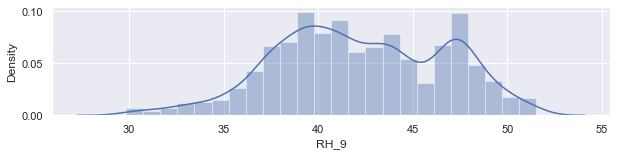

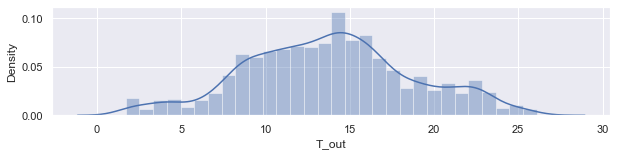

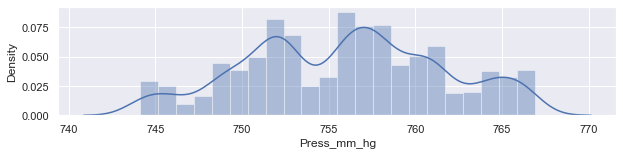

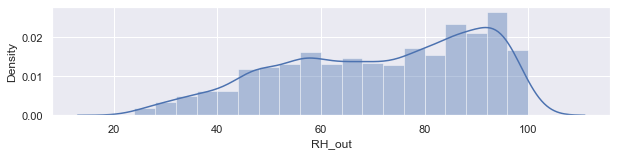

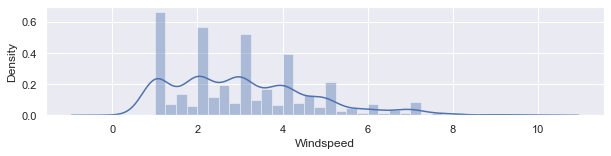

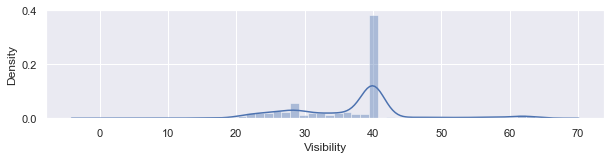

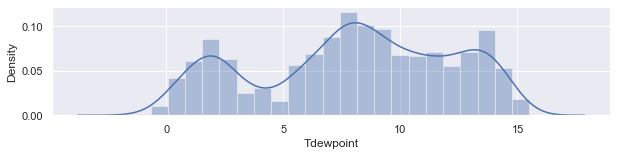

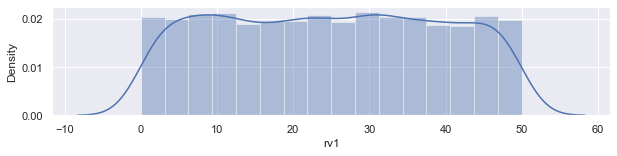

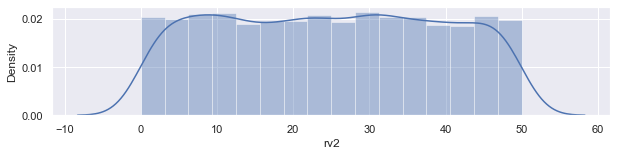

In [8]:
plt.rcParams['figure.figsize'] = [10, 2]
import warnings
warnings.filterwarnings("ignore")
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])
    plt.show()

1. Target variable ( Appliances )  - Most values are between 50 to 150 , almost 90% appliances consumption is less than 200 Wh, there are few outliers in this column as , big chunk of data lies one range, i.e. 50 - 150 Wh
2. Humidity : Rh6 is most values are in left half and all other almost follows the normal distribution
3. temp - all follows the normal distribution
4. rv1 and rv2 - almost equal for all the entries , so no any different information which is useful

In [9]:
df = df.drop(['rv1','rv2'], axis=1) # no significant information
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,50,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,37.730000,19.5,...,22.2,40.000000,19.166667,38.200000,4.30,763.700000,86.000000,2.000000,40.000000,2.20
1,60,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,37.663333,19.5,...,22.2,40.400000,19.133333,38.290000,4.28,763.716667,86.333333,2.166667,38.166667,2.22
2,50,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,37.590000,19.5,...,22.2,41.000000,19.133333,38.363333,4.27,763.733333,86.666667,2.333333,36.333333,2.23
3,50,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,37.500000,19.5,...,22.2,41.333333,19.166667,38.500000,4.25,763.750000,87.000000,2.500000,34.500000,2.25
4,60,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,37.500000,19.5,...,22.2,41.626667,19.166667,38.633333,4.23,763.766667,87.333333,2.666667,32.666667,2.27


In [10]:
corr_matrix = df.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol[:20]
# df.corr().unstack().sort_values(ascending=False).drop_duplicates()[:20]

RH_1  RH_4         0.970296
T6    T_out        0.939626
RH_1  RH_3         0.929793
T7    T9           0.928785
RH_3  RH_4         0.917736
RH_7  Tdewpoint    0.915939
T1    T4           0.915176
T4    T7           0.914284
RH_7  RH_8         0.914254
RH_4  RH_8         0.904696
RH_8  RH_9         0.899107
RH_1  RH_8         0.896359
RH_4  RH_7         0.896279
RH_1  RH_7         0.893825
RH_7  RH_9         0.890763
RH_4  Tdewpoint    0.884897
T2    T6           0.881873
RH_1  RH_9         0.881308
RH_4  RH_9         0.881296
RH_3  RH_8         0.880111
dtype: float64

Based on our Correlation matrix, we can remove RH_4, RH_8, RH_3, T_Out, T9, T7, T4, Tdewpoint as these are highly correlated(>0.9) with one or other features. 

In [103]:
df = df.drop(['RH_4','RH_8','RH_3','T_out', 'T9', 'T7', 'T4', 'Tdewpoint'], axis=1) # no significant information
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,T5,RH_5,T6,RH_6,RH_7,T8,RH_9,Press_mm_hg,RH_out,Windspeed,Visibility
0,50,21.200000,38.2000,18.390000,41.40,23.200000,19.5,47.29,4.80,40.060000,31.6,22.2,38.200000,763.700000,86.000000,2.000000,40.000000
1,60,21.150000,38.1725,18.390000,41.50,23.133333,19.5,47.29,4.80,40.090000,31.6,22.2,38.290000,763.716667,86.333333,2.166667,38.166667
2,50,21.133333,38.0900,18.323333,41.50,23.200000,19.5,47.26,4.66,40.030000,31.6,22.2,38.363333,763.733333,86.666667,2.333333,36.333333
3,50,21.100000,38.0900,18.290000,41.50,23.200000,19.5,47.26,4.53,41.300000,31.6,22.2,38.500000,763.750000,87.000000,2.500000,34.500000
4,60,21.100000,38.0300,18.290000,41.56,23.200000,19.5,47.20,4.59,41.833333,31.6,22.2,38.633333,763.766667,87.333333,2.666667,32.666667


In [11]:
df.shape

(3853, 25)

In [12]:
new_df_var=df.columns.values.tolist()
y=['Appliances']
X=[i for i in new_df_var if i not in y]
X=df[X]
y=df[y]

In [13]:
X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,37.730000,19.5,47.29,...,22.2,40.000000,19.166667,38.200000,4.30,763.700000,86.000000,2.000000,40.000000,2.20
1,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,37.663333,19.5,47.29,...,22.2,40.400000,19.133333,38.290000,4.28,763.716667,86.333333,2.166667,38.166667,2.22
2,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,37.590000,19.5,47.26,...,22.2,41.000000,19.133333,38.363333,4.27,763.733333,86.666667,2.333333,36.333333,2.23
3,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,37.500000,19.5,47.26,...,22.2,41.333333,19.166667,38.500000,4.25,763.750000,87.000000,2.500000,34.500000,2.25
4,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,37.500000,19.5,47.20,...,22.2,41.626667,19.166667,38.633333,4.23,763.766667,87.333333,2.666667,32.666667,2.27


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we will Standardize Our Data. As we checked that distribution for all column follows Normal Distribution , So it is suggested to use StandardScaler(). 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.fit_transform(x_test)
y_train[y_train.columns] = scaler.fit_transform(y_train)
y_test[y_test.columns] = scaler.fit_transform(y_test)

### Linear Regression using Ridge regularization(L2)

In [191]:
from sklearn.linear_model import Ridge

In [192]:
clf = Ridge()
clf.fit(x_train, y_train.values.ravel())

Ridge()

In [193]:
#results on test_data
#Past Research says that, R2 values of 0.75, 0.50, or 0.25 can, as a rough rule of thumb,
# be respectively described as substantial, moderate, or weak.
import sklearn
y_pred = clf.predict(x_test)
print(" R2 score for training data :",sklearn.metrics.r2_score(y_train,clf.predict(x_train)))
print(" R2 score for testing data :",sklearn.metrics.r2_score(y_test,clf.predict(x_test)))

 R2 score for training data : 0.19184223891978802
 R2 score for testing data : 0.1708942422630375


1. Training and Testing R2 score , both are low. 
2. Have not used Lasso because we know lasso is used in case of less number of features are important. 

### DecisionTreeRegressor

In [194]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train.values.ravel())

DecisionTreeRegressor()

In [195]:
#results on test_data
#Past Research says that, R2 values of 0.75, 0.50, or 0.25 can, as a rough rule of thumb,
# be respectively described as substantial, moderate, or weak.
import sklearn
y_pred = clf.predict(x_test)
print(" R2 score for training data :",sklearn.metrics.r2_score(y_train,clf.predict(x_train)))
print(" R2 score for testing data :",sklearn.metrics.r2_score(y_test,clf.predict(x_test)))

 R2 score for training data : 1.0
 R2 score for testing data : 0.22052653531006539


1. Using Decision tree its clearly visible that , it is overfitting and R2 score for testing data is very low, a classic example of high variance problem.
2. Hence not tuning it further as it very low R2 score on testing data

### Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

Building Random Forest model and parameter tuning

In [175]:
# Build a pipeline object
pipe = Pipeline([
    ('clf', RandomForestRegressor(random_state=0, n_jobs=-1))
])

# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [100, 150, 200, 500, 1000],
    "clf__max_depth": [50,60,70,80],
    "clf__max_features": ['auto', 'sqrt']
}

from sklearn.model_selection import GridSearchCV
# Perform grid search, fit it
grid_search_RF = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1000,scoring = 'r2')
grid_search_RF.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100
[CV 1/5; 1/12] END clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100; total time=   2.7s
[CV 2/5; 1/12] START clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100
[CV 2/5; 1/12] END clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100; total time=   0.6s
[CV 3/5; 1/12] START clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100
[CV 3/5; 1/12] END clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100; total time=   0.6s
[CV 4/5; 1/12] START clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100
[CV 4/5; 1/12] END clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100; total time=   0.5s
[CV 5/5; 1/12] START clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100
[CV 5/5; 1/12] END clf__max_depth=50, clf__max_features=auto, clf__n_estimators=100; total ti

[CV 4/5; 9/12] END clf__max_depth=80, clf__max_features=auto, clf__n_estimators=200; total time=   1.1s
[CV 5/5; 9/12] START clf__max_depth=80, clf__max_features=auto, clf__n_estimators=200
[CV 5/5; 9/12] END clf__max_depth=80, clf__max_features=auto, clf__n_estimators=200; total time=   1.1s
[CV 1/5; 10/12] START clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100
[CV 1/5; 10/12] END clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100; total time=   0.3s
[CV 2/5; 10/12] START clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100
[CV 2/5; 10/12] END clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100; total time=   0.3s
[CV 3/5; 10/12] START clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100
[CV 3/5; 10/12] END clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100; total time=   0.3s
[CV 4/5; 10/12] START clf__max_depth=80, clf__max_features=sqrt, clf__n_estimators=100
[CV 4/5; 10/12] END clf__max_depth=80, clf_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=0))]),
             param_grid={'clf__max_depth': [50, 80],
                         'clf__max_features': ['auto', 'sqrt'],
                         'clf__n_estimators': [100, 150, 200]},
             scoring='r2', verbose=1000)

In [16]:
grid=grid_search_RF.best_params_
grid

NameError: name 'grid_search_RF' is not defined

In [19]:
clf = RandomForestRegressor(max_depth=grid['clf__max_depth'], n_estimators=grid['clf__n_estimators'], max_features=grid['clf__max_features'] )
clf.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_depth=80, max_features='sqrt', n_estimators=200)

## Model performance on test data

In [20]:
#results on test_data
#Past Research says that, R2 values of 0.75, 0.50, or 0.25 can, as a rough rule of thumb,
# be respectively described as substantial, moderate, or weak.
import sklearn
y_pred = clf.predict(x_test)
print(" R2 score for training data :",sklearn.metrics.r2_score(y_train,clf.predict(x_train)))
print(" R2 score for testing data :",sklearn.metrics.r2_score(y_test,clf.predict(x_test)))

 R2 score for training data : 0.9388537588048016
 R2 score for testing data : 0.5322578506825388


In [200]:
feature_imp = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print(feature_imp)

T3             0.087411
T6             0.083825
RH_1           0.075924
RH_out         0.072339
T2             0.069129
RH_9           0.067429
RH_6           0.064404
Press_mm_hg    0.063151
RH_7           0.061347
RH_2           0.059701
T8             0.058433
RH_5           0.057250
T1             0.052612
Windspeed      0.050302
T5             0.046656
Visibility     0.030086
dtype: float64


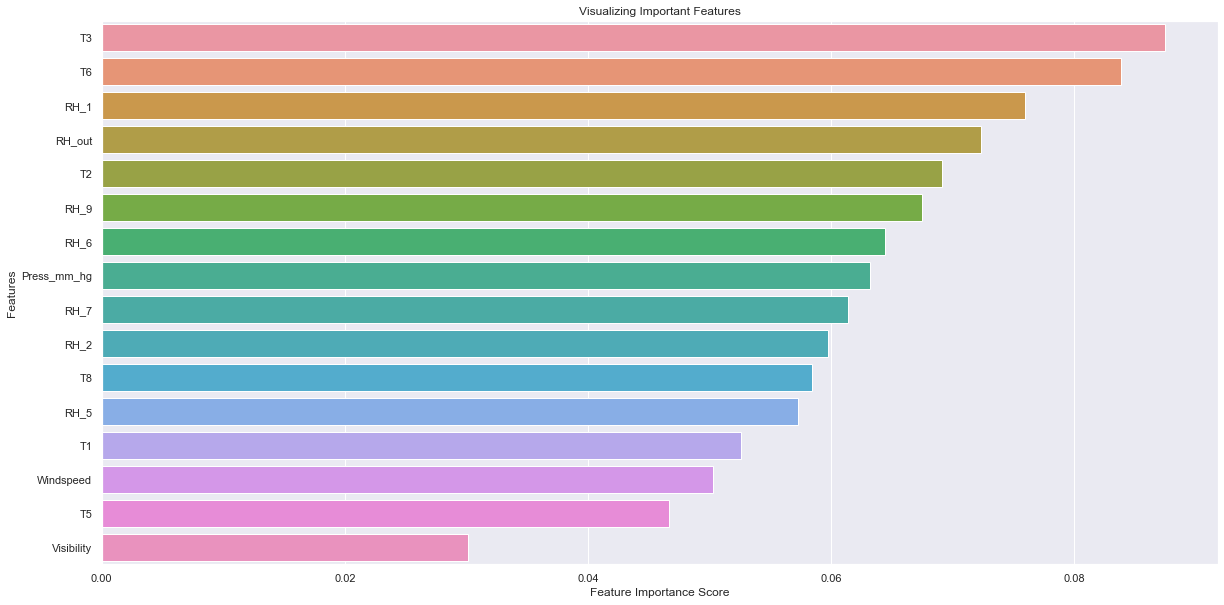

In [201]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Observations and motivation for next steps

1. Ridge regularization was not fitting the model having very less r2 score and same case with testing , High bias and high variance problem. 
2. Using Decision tree its clearly visible that , it is overfitting and R2 score for testing data is very low, a classic example of high variance problem.
3. Random Foresst regressor giving us moderate result with good r2 score. 
4. Plotted the top important features. 
5. T3, temp in laundary was the most important parameter.
6. Outside temp and outside temp from station were also very important
7. Pressure and wind speed are important parameters in the prediction.

## Build a business case for next steps 

1. Electricity Supply and demand optimization -  Optimal electricity production at 10 min interval and that much you can buy from government and you can fullfill that amount, it will save electricity waste and cost will reduce. 
prodcution == distribution ( goal or optimize this )



2. I will extrapolate data to find the consumption of energy by Appliances for every 10 min in different kind of houses with different numbers of rooms( like 1bhk , 2bhk , 3bhlk, etc) using some extrapolation method.

## References (add your references below)
1. Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,
2. https://www.researchgate.net/post/what_is_the_acceptable_r-squared_value
3. https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
4. https://stackoverflow.com/questions/55070918/does-setting-a-random-state-in-sklearns-randomforestclassifier-bias-your-model